In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#import dataset from drive
df= pd.read_csv("/content/drive/MyDrive/office dataset/all_data_32.csv")
df.head()

,Unnamed: 0,device_id,timestamp,date_time,x,x_g,y,y_g,z,z_g,rumination
0,0,S1006,1644447600,10/02/2022-05:00:00,-57,-8.737031,-14,-2.145938,-15,-2.299219,1
1,1,S1006,1644447601,10/02/2022-05:00:00,-59,-9.043594,-14,-2.145938,-16,-2.452500,1
2,2,S1006,1644447601,10/02/2022-05:00:01,-57,-8.737031,-14,-2.145938,-14,-2.145938,1
3,3,S1006,1644447602,10/02/2022-05:00:01,-56,-8.583750,-12,-1.839375,-14,-2.145938,1
4,4,S1006,1644447602,10/02/2022-05:00:02,-57,-8.737031,-14,-2.145938,-14,-2.145938,1


In [ ]:
df1=df.drop(columns=['Unnamed: 0','device_id', 'timestamp','date_time','x_g','y_g','z_g' ])

In [ ]:
df1.shape

(831362, 4)

In [ ]:
df1.isnull().sum()

x             0
y             0
z             0
rumination    0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831362 entries, 0 to 831361
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   x           831362 non-null  int64
 1   y           831362 non-null  int64
 2   z           831362 non-null  int64
 3   rumination  831362 non-null  int64
dtypes: int64(4)
memory usage: 25.4 MB


In [ ]:
df1.isnull().values.any()

False

In [ ]:
df1.corr()

,x,y,z,rumination
x,1.000000,-0.167331,-0.171027,0.124163
y,-0.167331,1.000000,-0.026324,-0.460487
z,-0.171027,-0.026324,1.000000,-0.020730
rumination,0.124163,-0.460487,-0.020730,1.000000


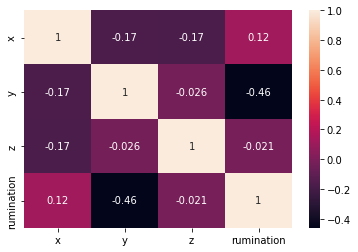

In [ ]:
#visualizing the correlation matrix
import seaborn as sns

correlationmatrix= df1.corr()
top_correlated_features= correlationmatrix.index


sns.heatmap(df1[top_correlated_features].corr(), annot= True)

In [ ]:
print(df1)

         x   y   z  rumination
0      -57 -14 -15           1
1      -59 -14 -16           1
2      -57 -14 -14           1
3      -56 -12 -14           1
4      -57 -14 -14           1
...     ..  ..  ..         ...
831357 -55  -1  -1           0
831358 -58  -9  -3           0
831359 -76 -18   1           0
831360 -59  -8  -8           0
831361 -64 -10  -3           0

[831362 rows x 4 columns]


In [ ]:
#Splitting our datset
from sklearn.model_selection import train_test_split
X= df1.iloc[:,0:3]
y=df1.iloc[: , -1]
print(X.head())
print(y.head())

    x   y   z
0 -57 -14 -15
1 -59 -14 -16
2 -57 -14 -14
3 -56 -12 -14
4 -57 -14 -14
0    1
1    1
2    1
3    1
4    1
Name: rumination, dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
imputer_obj= SimpleImputer(missing_values=0, strategy= "mean")
#pd.DataFrame(X)
X = imputer_obj.fit_transform(np.nan_to_num(X))

In [ ]:
#split our data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=50)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model= RandomForestClassifier(n_jobs=10,n_estimators=20, random_state=50,min_samples_split=5)
X_train = np.nan_to_num(X_train.astype(np.float64))
y_train = np.nan_to_num(y_train.astype(np.float64))
rand = random_forest_model.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(rand,X,y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))


Cross Validation Scores are [0.67756641 0.66712575 0.77661302 0.76060311 0.70948807]
Average Cross Validation score :0.718279271684754


In [ ]:
predictions_y= random_forest_model.predict(X_train)
from sklearn import metrics
y_test = np.nan_to_num(y_test.astype(np.float64))
print("Train Accuracy= {0: .3f}".format(metrics.accuracy_score(y_train, predictions_y)))


Train Accuracy=  0.767


In [ ]:
predictions= random_forest_model.predict(X_test)
from sklearn import metrics
y_test = np.nan_to_num(y_test.astype(np.float64))
print("Test Accuracy= {0: .3f}".format(metrics.accuracy_score(y_test, predictions)))

Test Accuracy=  0.751


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[136179  26968]
 [ 35174  51088]]
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81    163147
         1.0       0.65      0.59      0.62     86262

    accuracy                           0.75    249409
   macro avg       0.72      0.71      0.72    249409
weighted avg       0.75      0.75      0.75    249409

0.7508429928350621


In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [ ]:
#Hyperparameter Tuning using RandomizedSearchCV
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import xgboost

In [ ]:
classifier= xgboost.XGBClassifier(oob_score=False)

In [ ]:
random_search = RandomizedSearchCV(classifier, 
                                  param_distributions=params, 
                                  n_iter=10, 
                                  scoring='accuracy', 
                                  n_jobs=5, 
                                  cv=5,
                                  verbose=3)

this is for SMOTE Algorithm

In [ ]:
final_classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.05, max_delta_step=1, max_depth=8,eta= 0.3,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=50,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)
final_classifier.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.5, eta=0.3, learning_rate=0.05,
              max_delta_step=1, max_depth=8, min_child_weight=4, n_jobs=50,
              random_state=42, subsample=0.5)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y_train)
print('Before', counter)
smt= SMOTE()
X_train_sm,y_train_sm = smt.fit_resample(X_train,y_train)
counter = Counter (y_train_sm)
print('after', counter)


Before Counter({0: 435004, 1: 230085})
after Counter({1: 435004, 0: 435004})


In [ ]:
final_classifier.fit(X_train_sm, y_train_sm)

XGBClassifier(colsample_bytree=0.5, eta=0.3, learning_rate=0.05,
              max_delta_step=1, max_depth=8, min_child_weight=4, n_jobs=50,
              random_state=42, subsample=0.5)

In [ ]:
predictions = final_classifier.predict(X_train_sm)
y_pred= final_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(y_test, y_pred)
print("Train Accuracy= {0: .3f}".format(metrics.accuracy_score(y_train_sm, predictions)))
print("Test Accuracy= {0: .3f}".format(metrics.accuracy_score(y_test, y_pred)))
accuracy=accuracy_score(y_test, y_pred)
print("accuracy =", accuracy)
print(cm)

Train Accuracy=  0.737
Test Accuracy=  0.692
accuracy = 0.6921749171543184
[[65645 42628]
 [ 8555 49445]]


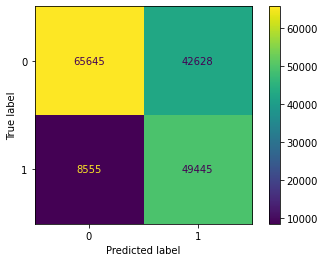

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.61      0.72    108273
           1       0.54      0.85      0.66     58000

    accuracy                           0.69    166273
   macro avg       0.71      0.73      0.69    166273
weighted avg       0.76      0.69      0.70    166273



ADASYN algorithm

In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter
counter = Counter(y_train)
print('Before', counter)
ada = ADASYN(random_state = 130)
X_train_ada,y_train_ada = ada.fit_resample(X_train,y_train)
counter = Counter (y_train_ada)
print('after', counter)


Before Counter({0: 435004, 1: 230085})
after Counter({0: 435004, 1: 427587})


In [ ]:
final_classifier.fit(X_train_ada, y_train_ada)

XGBClassifier(colsample_bytree=0.5, eta=0.3, learning_rate=0.05,
              max_delta_step=1, max_depth=8, min_child_weight=4, n_jobs=50,
              random_state=42, subsample=0.5)

In [ ]:
predictions = final_classifier.predict(X_train_ada)
y_pred= final_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(y_test, y_pred)
print("Train Accuracy= {0: .3f}".format(metrics.accuracy_score(y_train_ada, predictions)))
print("Test Accuracy= {0: .3f}".format(metrics.accuracy_score(y_test, y_pred)))
accuracy=accuracy_score(y_test, y_pred)
print("accuracy =", accuracy)
print(cm)

Train Accuracy=  0.719
Test Accuracy=  0.684
accuracy = 0.6842241374125685
[[62992 45281]
 [ 7224 50776]]


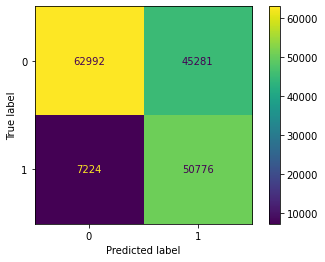

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.58      0.71    108273
           1       0.53      0.88      0.66     58000

    accuracy                           0.68    166273
   macro avg       0.71      0.73      0.68    166273
weighted avg       0.77      0.68      0.69    166273



Hybridization: SMOTE + ENN

In [ ]:
from imblearn.combine import SMOTEENN 
from collections import Counter
counter = Counter(y_train)
print('Before', counter)
smenn = SMOTEENN(ratio='auto', random_state=42, smote=None, enn=None, k=None, m=None, out_step=None, kind_smote=None, size_ngh=None, n_neighbors=None, kind_enn=None, n_jobs=None)
X_train_smenn,y_train_smenn = smenn.fit_resample(X_train,y_train)
counter = Counter (y_train_smenn)
print('after', counter)


Before Counter({0: 435004, 1: 230085})
after Counter({0: 233467, 1: 111089})


In [ ]:
final_classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.05, max_delta_step=1, max_depth=8,eta= 0.3,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=50,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [ ]:
final_classifier.fit(X_train_smenn, y_train_smenn)

XGBClassifier(colsample_bytree=0.5, eta=0.3, learning_rate=0.05,
              max_delta_step=1, max_depth=8, min_child_weight=4, n_jobs=50,
              random_state=42, subsample=0.5)

In [ ]:
predictions = final_classifier.predict(X_train_smenn)
y_pred= final_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(y_test, y_pred)
print("Train Accuracy= {0: .3f}".format(metrics.accuracy_score(y_train_smenn, predictions)))
print("Test Accuracy= {0: .3f}".format(metrics.accuracy_score(y_test, y_pred)))
accuracy=accuracy_score(y_test, y_pred)
print("accuracy =", accuracy)
print(cm)

Train Accuracy=  0.915
Test Accuracy=  0.723
accuracy = 0.7227451239828475
[[84637 23636]
 [22464 35536]]


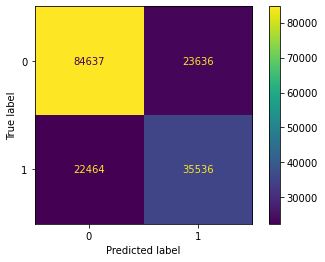

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.78      0.79    108273
           1       0.60      0.61      0.61     58000

    accuracy                           0.72    166273
   macro avg       0.70      0.70      0.70    166273
weighted avg       0.72      0.72      0.72    166273



This is for random forest

In [ ]:
rand = random_forest_model.fit(X_train_ada, y_train_ada)

In [ ]:
predictions = rand.predict(X_train_ada)
y_pred= rand.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(y_test, y_pred)
print("Train Accuracy= {0: .3f}".format(metrics.accuracy_score(y_train_ada, predictions)))
print("Test Accuracy= {0: .3f}".format(metrics.accuracy_score(y_test, y_pred)))
accuracy=accuracy_score(y_test, y_pred)
print("accuracy =", accuracy)
print(cm)

Train Accuracy=  0.759
Test Accuracy=  0.707
accuracy = 0.70736078617695
[[69299 38974]
 [ 9684 48316]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74    108273
           1       0.55      0.83      0.67     58000

    accuracy                           0.71    166273
   macro avg       0.72      0.74      0.70    166273
weighted avg       0.76      0.71      0.71    166273



this is for SM in Random forest

In [ ]:
rand = random_forest_model.fit(X_train_sm, y_train_sm)

In [ ]:
predictions = rand.predict(X_train_sm)
y_pred= rand.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(y_test, y_pred)
print("Train Accuracy= {0: .3f}".format(metrics.accuracy_score(y_train_sm, predictions)))
print("Test Accuracy= {0: .3f}".format(metrics.accuracy_score(y_test, y_pred)))
accuracy=accuracy_score(y_test, y_pred)
print("accuracy =", accuracy)
print(cm)

Train Accuracy=  0.775
Test Accuracy=  0.723
accuracy = 0.7234307434159485
[[73116 35157]
 [10829 47171]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76    108273
           1       0.57      0.81      0.67     58000

    accuracy                           0.72    166273
   macro avg       0.72      0.74      0.72    166273
weighted avg       0.77      0.72      0.73    166273



sMOTE + enn IN rANDOMFOREST

In [ ]:
rand = random_forest_model.fit(X_train_smenn, y_train_smenn)

In [ ]:
predictions = rand.predict(X_train_smenn)
y_pred= rand.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(y_test, y_pred)
print("Train Accuracy= {0: .3f}".format(metrics.accuracy_score(y_train_smenn, predictions)))
print("Test Accuracy= {0: .3f}".format(metrics.accuracy_score(y_test, y_pred)))
accuracy=accuracy_score(y_test, y_pred)
print("accuracy =", accuracy)
print(cm)

Train Accuracy=  0.999
Test Accuracy=  0.734
accuracy = 0.7340999440678884
[[86080 22193]
 [22019 35981]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80    108273
           1       0.62      0.62      0.62     58000

    accuracy                           0.73    166273
   macro avg       0.71      0.71      0.71    166273
weighted avg       0.73      0.73      0.73    166273

